# BANK-MAKETING ANALYSIS

<img src="images/telemarketing.png">
<br><hr><br>


Com o objetivo de modelar a efetividade da campanha de marketing do Banco Banco S.A., apresenta-se aqui uma exploração das variáveis levantadas referentes à [última campanha realizada](https://archive.ics.uci.edu/ml/datasets/bank+marketing).

##### Consultores:

- Anderson 
- Caio Viera
- Pedro Correia

A seguir, a descrição de cada uma das variáveis disponíveis:

### Input variables:
#### bank client data:

   1. age (numeric)
   2. job : type of job (categorical: "admin.","blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown")
   3. marital : marital status (categorical: "divorced", "married", "single", "unknown"; note: "divorced" means divorced or widowed)
   4. education (categorical: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown")
   5. default: has credit in default? (categorical: "no", "yes", "unknown")
   6. housing: has housing loan? (categorical: "no", "yes", "unknown")
   7. loan: has personal loan? (categorical: "no", "yes", "unknown")
   

### Input variables:
#### related with the last contact of the current campaign:

   8. contact: contact communication type (categorical: "cellular","telephone") 
   9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
   11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Input variables:
#### other attributes:
  
   12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
   14. previous: number of contacts performed before this campaign and for this client (numeric)
   15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  
#### social and economic context attributes
   
   16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
   17. cons.price.idx: consumer price index - monthly indicator (numeric)     
   18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
   19. euribor3m: euribor 3 month rate - daily indicator (numeric)
   20. nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
  
   21. y - has the client subscribed a term deposit? (binary: "yes","no")


### Missing Attribute Values: 
There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 


### Incializando o ambiente
- Importando Bibliotecas
- Carregando os dados

In [1]:
# importando as bibliotecas utilizadas nessa

# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')
cp = sns.color_palette()
%matplotlib inline

# extras
import warnings
warnings.filterwarnings('ignore')

# 
from bma_functions import *

In [2]:
# carregando os dados
data = load_data('data/historical-data.csv') #sample maq local
data.shape

(37069, 22)

In [3]:
data.head().T

,0,1,2,3,4
age,36,37,50,38,54
job,admin.,self-employed,blue-collar,student,housemaid
marital,married,married,married,divorced,married
education,high.school,basic.9y,basic.9y,unknown,professional.course
default,no,no,unknown,no,no
housing,unknown,yes,no,no,no
loan,unknown,yes,no,no,no
contact,cellular,telephone,cellular,cellular,cellular
month,jul,may,aug,may,jul
day_of_week,fri,fri,thu,tue,tue


### Variável Resposta

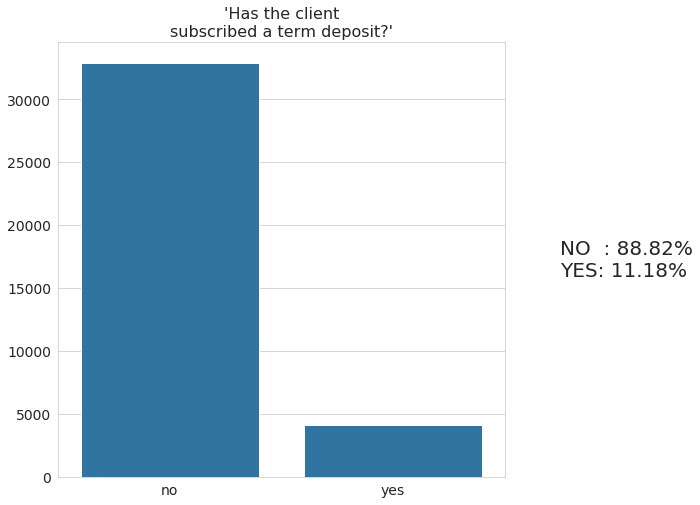

In [5]:
plot_target(data, savefig=False);

Percebe-se que o target de nosso dataset apresenta significativo desbalanceamento. Com isso, faz-se necessário ter especial atenção ao *recall* atingido pelo modelo.

### Dados Categóricos

In [9]:
data_cat = get_categorical_fields(data)
data_cat['y_numeric'] = data['y_numeric']

In [10]:
# avaliando a cardinalidade das variáveis categóricas
print_cardinalities(data_cat)

There are 11 categorical features in the data set:
  - job            (cardinality: 12)
  - marital        (cardinality: 4)
  - education      (cardinality: 8)
  - default        (cardinality: 3)
  - housing        (cardinality: 3)
  - loan           (cardinality: 3)
  - contact        (cardinality: 2)
  - month          (cardinality: 10)
  - day_of_week    (cardinality: 5)
  - poutcome       (cardinality: 3)
  - y              (cardinality: 2)


Nenhuma cardinalidade parece excessiva, de forma que não vamos tratar adicionalmente esse aspecto de nosso dataset.

Vamos buscar entender, na sequência, de forma individualizada como se comportam essas variáveis frente à proporção generalizada da variável resposta.

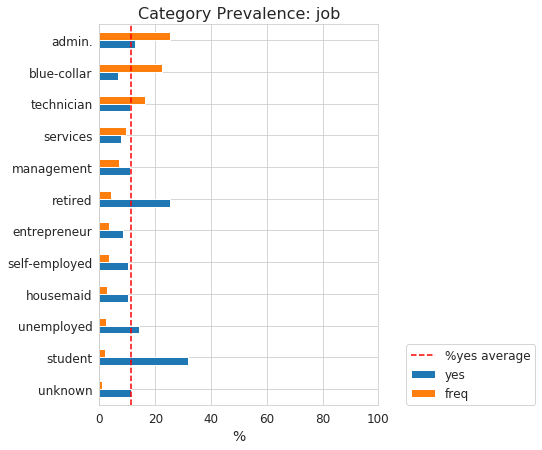

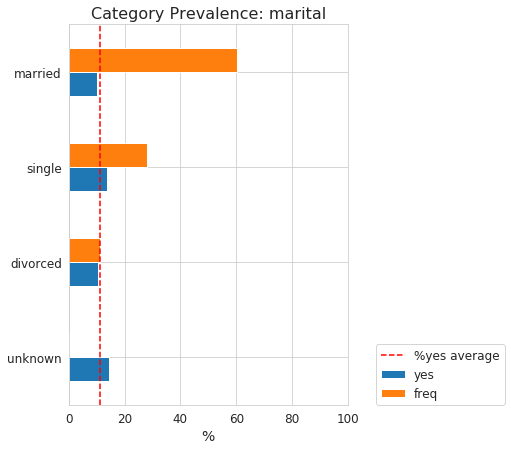

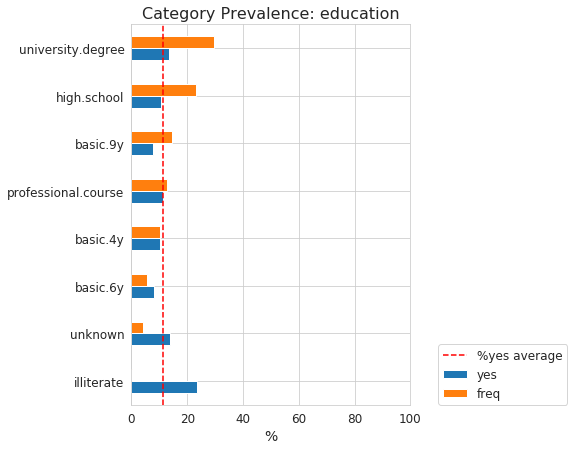

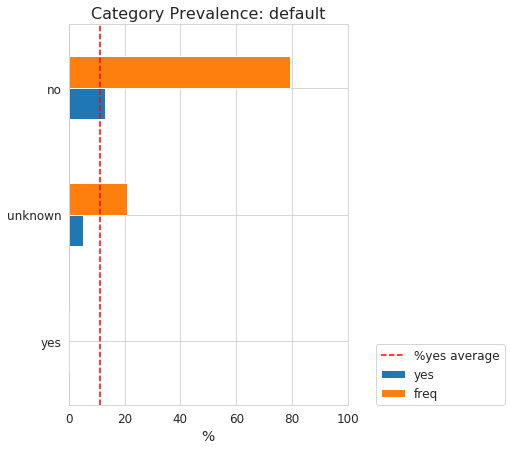

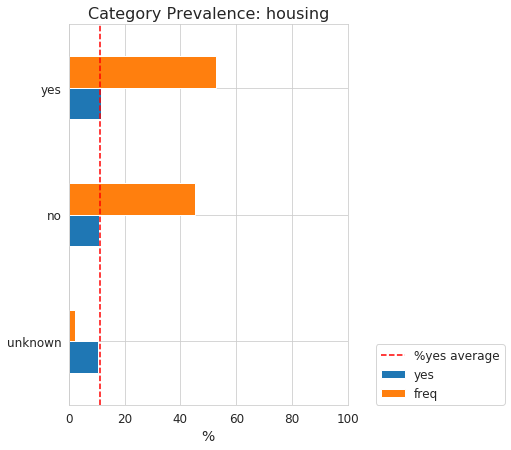

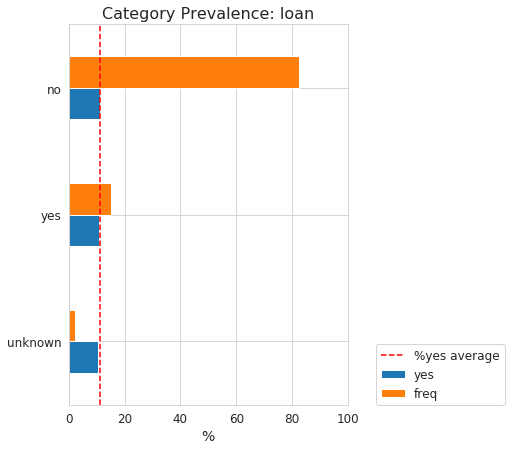

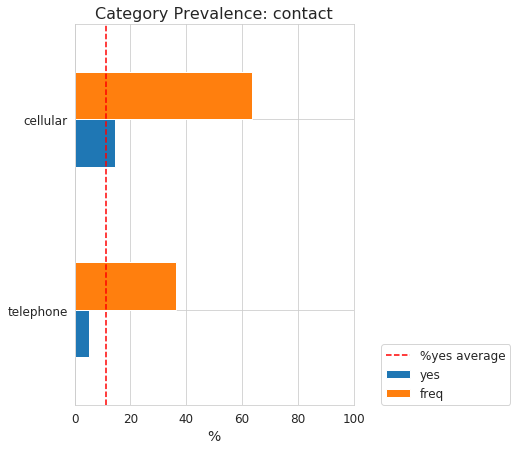

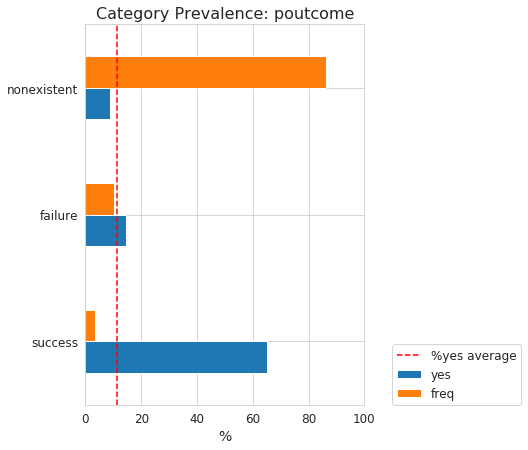

In [11]:
for cat_feature in data_cat.columns[:-2]:
    if cat_feature not in ('month', 'day_of_week'): # temporal data requires different approach
        plot_cat_prevalence(data_cat, cat_feature, xlim100=True, savefig=False)

In [12]:
# análise similar para dados de tempo
data_tempo = data[['month', 'day_of_week', 'y_numeric']]


### Dados Numéricos

In [334]:
data_num = data.select_dtypes(include = ['float64', 'int64'])

Para os dados numéricos, vamos, inicialmente vamos observar suas distribuições

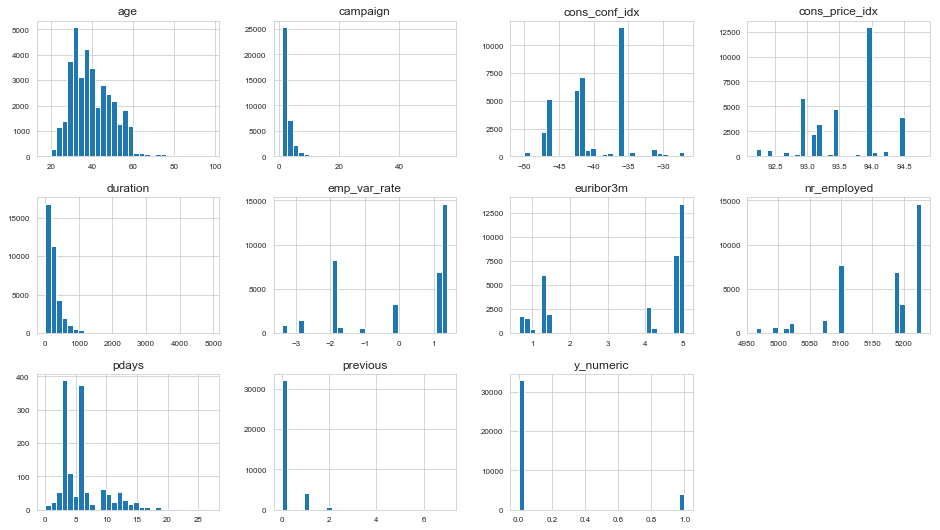

In [335]:
data_num_2plot = data_num.copy()
data_num_2plot.loc[data_num['pdays'] == 999, 'pdays'] = np.nan # tratamento necessário exclusivamente pelo grande número de valores 999 nessa variável
data_num_2plot.hist(bins=30, xlabelsize=8, ylabelsize=8, figsize=(16, 9), layout=(3,4));

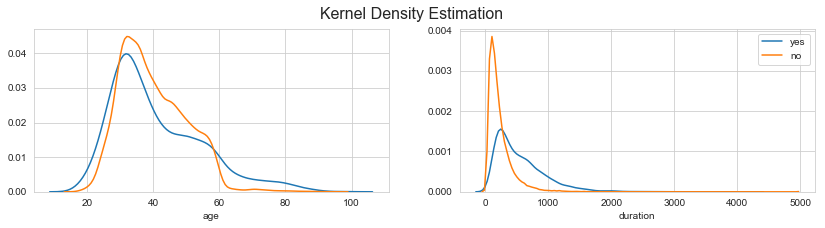

In [352]:
dad = data_num[['age', 'duration', 'y_numeric']]
fig, ax = plt.subplots(1, 2, figsize=(14,3))
ax[0] = sns.distplot(data_num.loc[dad['y_numeric']==1, 'age'], ax=ax[0], bins=30, hist=False)
ax[0] = sns.distplot(data_num.loc[dad['y_numeric']!=1, 'age'], ax=ax[0], bins=30, hist=False)
ax[1] = sns.distplot(data_num.loc[data_num['y_numeric']==1, 'duration'], ax=ax[1], bins=30, label='yes', hist=False)
ax[1] = sns.distplot(data_num.loc[data_num['y_numeric']!=1, 'duration'], ax=ax[1], bins=30, label='no', hist=False)
ax[1].legend(loc='best')
fig.suptitle('Kernel Density Estimation', size=16)
fig.savefig('plots/05_numeric_eg.png', bbox_inches='tight')

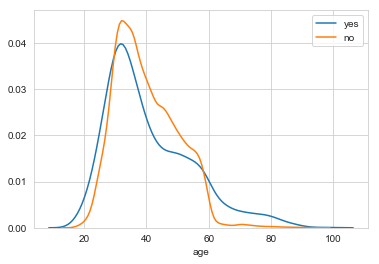

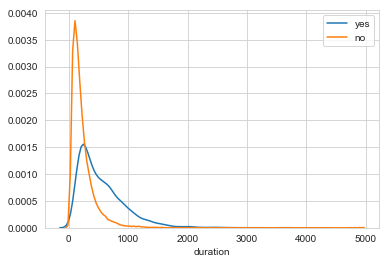

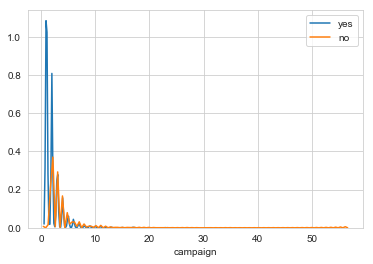

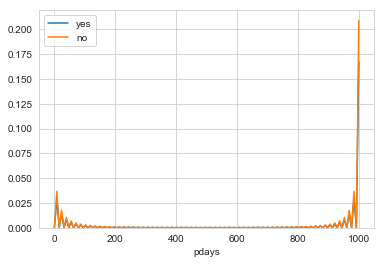

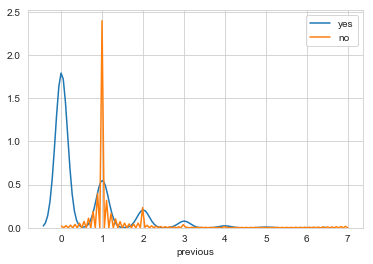

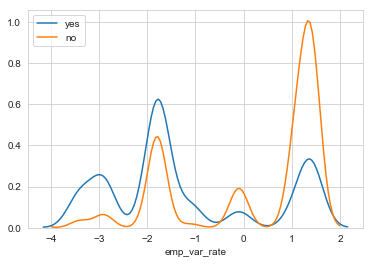

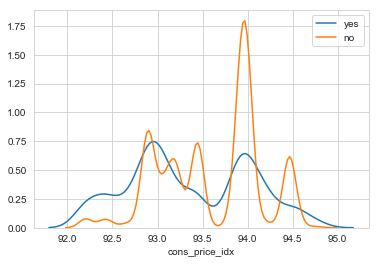

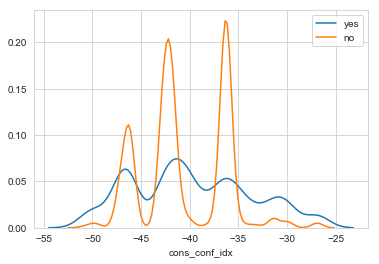

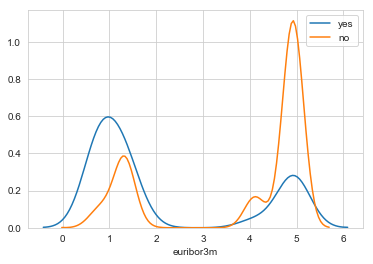

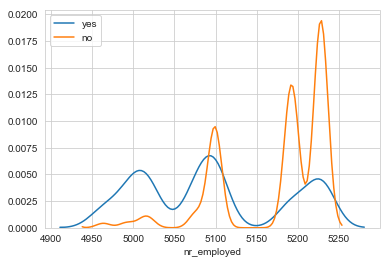

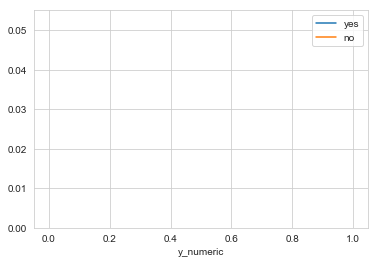

In [338]:
for c in data_num.columns:
    fig, ax = plt.subplots()
    ax = sns.distplot(data_num.loc[data_num['y_numeric']==1, c], ax=ax, bins=30, label='yes', hist=False)
    ax = sns.distplot(data_num.loc[data_num['y_numeric']!=1, c], ax=ax, bins=30, label='no', hist=False)
    ax.legend(loc='best')
 

In [13]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

Number of variables,22
Number of observations,37069
Total Missing (%),0.0%
Total size in memory,6.2 MiB
Average record size in memory,176.0 B
Numeric,8
Categorical,11
Boolean,1
Date,0
Text (Unique),0
Rejected,2


<hr>

In [386]:
data = pd.read_csv('data/bank-additional-full.csv', sep=';')

In [387]:
from sklearn.model_selection import train_test_split

In [388]:
X = pd.get_dummies(data.iloc[:,:-2].drop('duration', axis=1))
y = data['y'].map({'yes': 1, 'no': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [394]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=1000)
gbc.fit(X_train, y_train)
y_hat = gbc.predict(X_test)

Wall time: 1min 5s


In [395]:
from sklearn.metrics import accuracy_score, recall_score

print('acc:', accuracy_score(y_test, y_hat))
print('rcl:', recall_score(y_test, y_hat))



acc: 0.9011896091284293
rcl: 0.3065049614112459


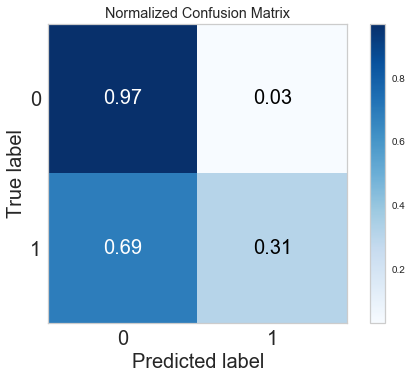

In [396]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_hat, text_fontsize=20, normalize=True)

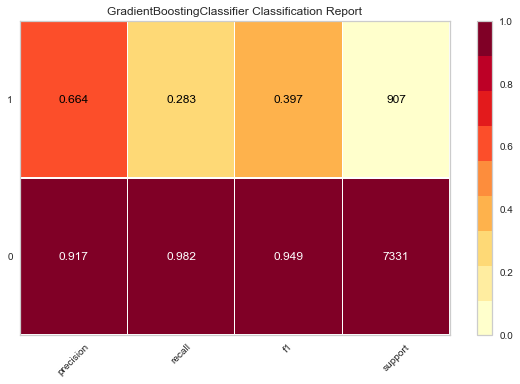

In [392]:
from yellowbrick.classifier import ClassificationReport

clf = GradientBoostingClassifier(n_estimators=200)
visualizer = ClassificationReport(clf, support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             

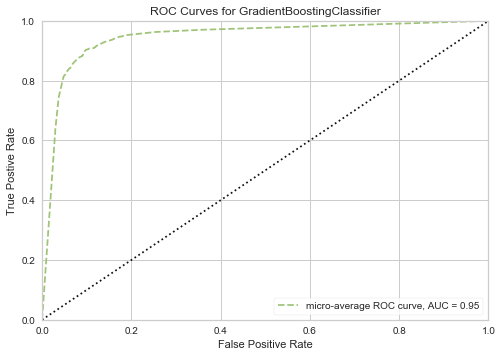

In [393]:
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model and visualizer
clf = GradientBoostingClassifier(n_estimators=200)
visualizer = ROCAUC(clf, macro=False, per_class=False)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

SMOTE

In [62]:
X, X_ho, y, y_ho = train_test_split(X, y, test_size=0.2, random_state=420)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=420)
X_res, y_res = sm.fit_sample(X, y)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=420)

In [143]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

gbc_res = GradientBoostingClassifier(n_estimators=500, learning_rate=0.005)
gbc_res.fit(X_train_res, y_train_res)
y_hat_res = gbc_res.predict(X_test_res)
y_hat_ho = gbc_res.predict(X_ho)

Wall time: 1min 22s


In [144]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

print("validation")
print('acc:', accuracy_score(y_test_res, y_hat_res))
print('rcl:', recall_score(y_test_res, y_hat_res))
print(confusion_matrix(y_test_res, y_hat_res))

print('\ntest')
print('acc:', accuracy_score(y_ho, y_hat_ho))
print('rcl:', recall_score(y_ho, y_hat_ho))
print(confusion_matrix(y_ho, y_hat_ho))

validation
acc: 0.8744759134080602
rcl: 0.8419983065198984
[[5248  534]
 [ 933 4972]]

test
acc: 0.8712066035445496
rcl: 0.5755237045203969
[[6655  676]
 [ 385  522]]


(0, 1)

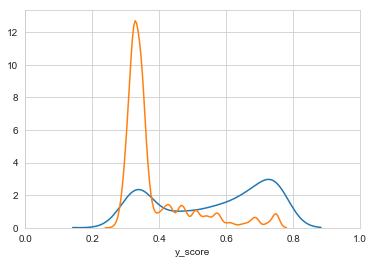

In [108]:
df_predictions = pd.DataFrame({
    'y_score': gbc_res.predict_proba(X_ho)[:, 1],
    'y': y_ho
})

fig, ax = plt.subplots()
ax = sns.distplot(df_predictions.loc[df_predictions['y']==1, 'y_score'], kde=True, hist=False, bins=30, ax=ax)
ax = sns.distplot(df_predictions.loc[df_predictions['y']!=1, 'y_score'], kde=True, hist=False, bins=30, ax=ax)
ax.set_xlim(0,1)

50   |  0.1     ok
50   |  0.01    ok
50   |  0.005   ok
50   |  0.001   ok
100  |  0.1     ok
100  |  0.01    ok
100  |  0.005   ok
100  |  0.001   ok
200  |  0.1     ok
200  |  0.01    ok
200  |  0.005   ok
200  |  0.001   ok
Wall time: 4min 4s


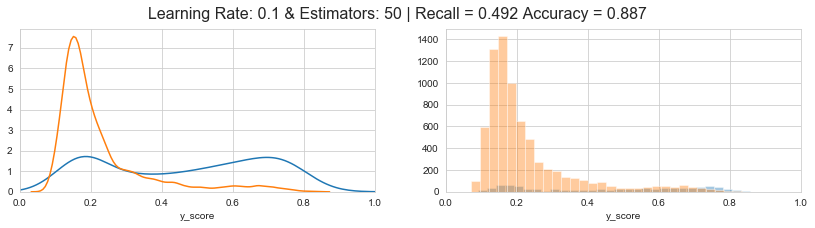

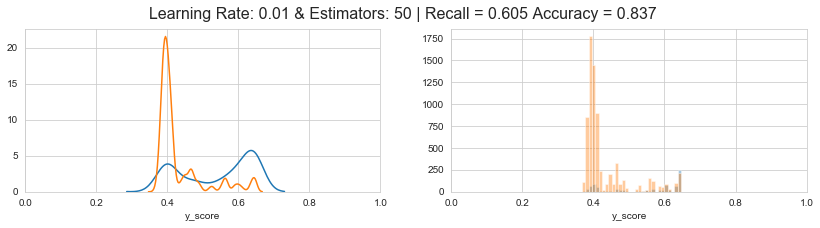

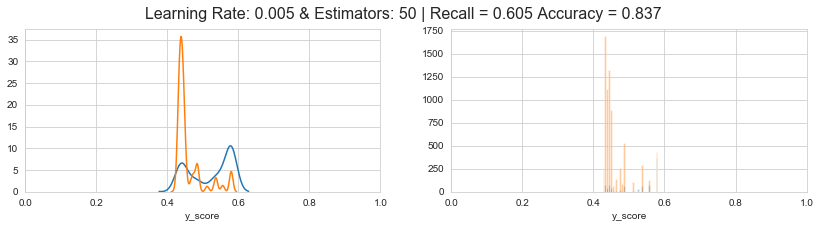

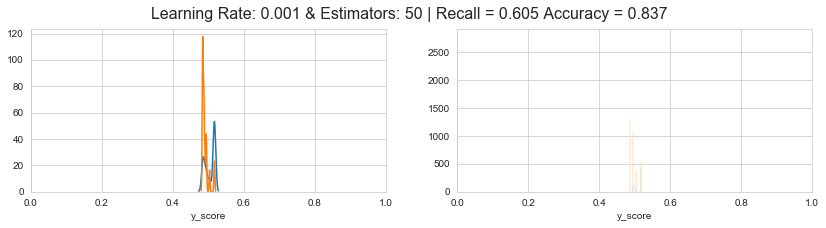

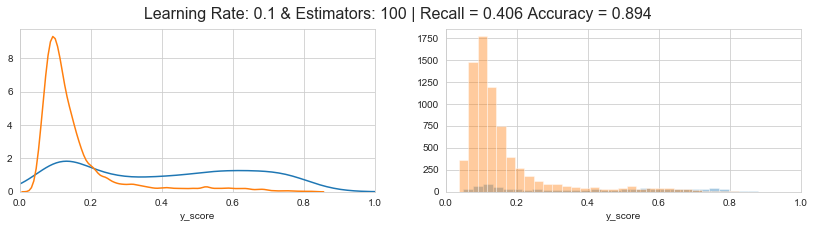

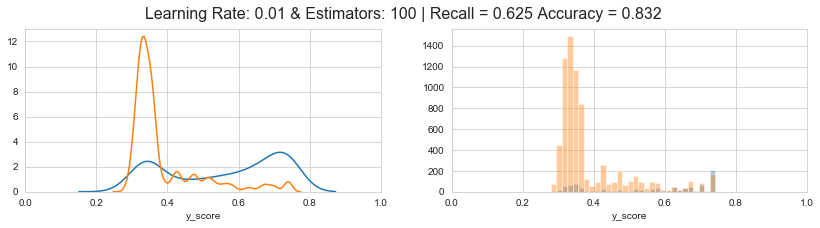

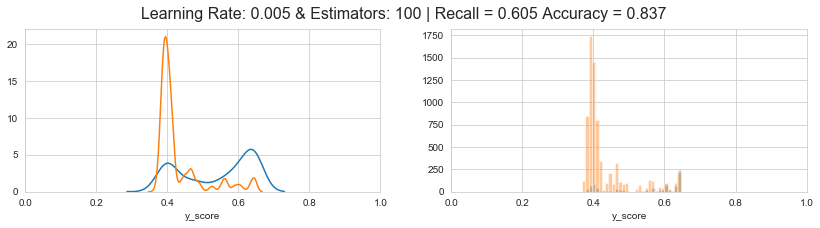

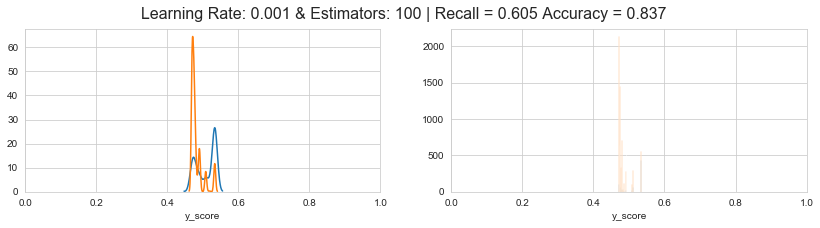

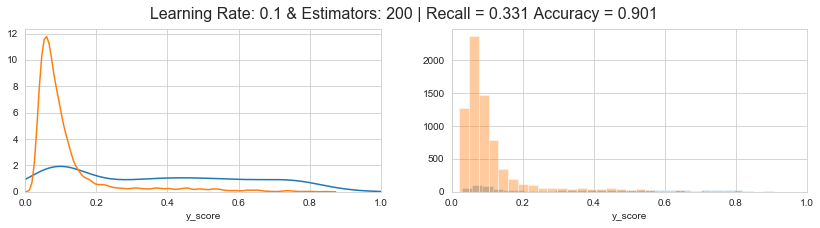

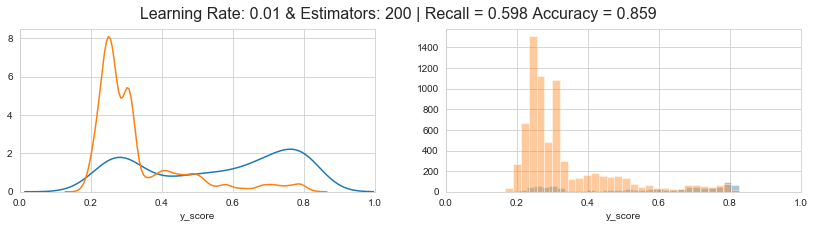

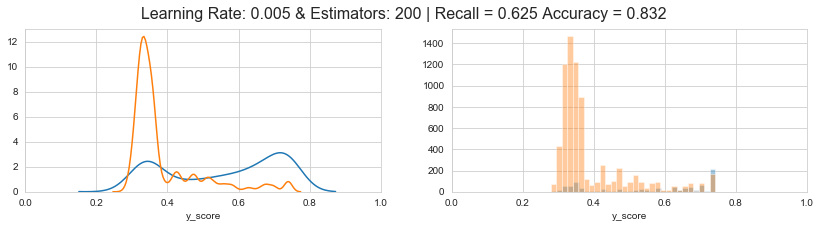

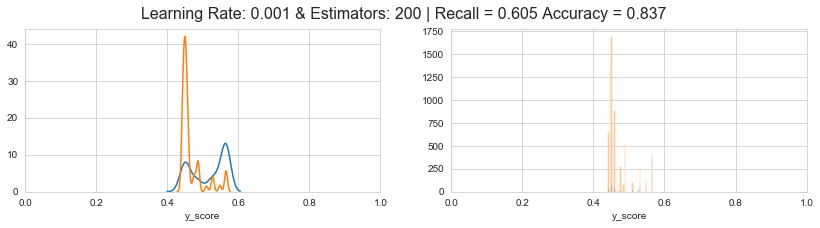

In [275]:
%%time
for n_estimators in [50,100,200]:
    for lr in [0.1, 0.01, 0.005, 0.001]:
        print(f'{n_estimators:<5}|  {lr:<8}', end='', flush=True)
        gbc_res = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=lr)
        gbc_res.fit(X_train_res, y_train_res)

        df_predictions = pd.DataFrame({
            'y_score': gbc_res.predict_proba(X_ho)[:, 1],
            'y': y_ho
        })

        accuracy = accuracy_score(y_ho, gbc_res.predict(X_ho))
        recall = recall_score(y_ho, gbc_res.predict(X_ho))

        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,3))
        ax[0] = sns.distplot(df_predictions.loc[df_predictions['y']==1, 'y_score'], kde=True, hist=False, bins=30, ax=ax[0])
        ax[0] = sns.distplot(df_predictions.loc[df_predictions['y']!=1, 'y_score'], kde=True, hist=False, bins=30, ax=ax[0])
        ax[0].set_xlim(0,1)

        ax[1] = sns.distplot(df_predictions.loc[df_predictions['y']==1, 'y_score'], kde=False, hist=True, bins=30, ax=ax[1])
        ax[1] = sns.distplot(df_predictions.loc[df_predictions['y']!=1, 'y_score'], kde=False, hist=True, bins=30, ax=ax[1])
        ax[1].set_xlim(0,1)

    #     fig.suptitle(f'{n_estimators} Estimadores - Recall = {recall:.3f} Accuracy = {accuracy:.3f}', fontsize=16)
        fig.suptitle(f'Learning Rate: {lr} & Estimators: {n_estimators} | Recall = {recall:.3f} Accuracy = {accuracy:.3f}', fontsize=16)
        fig.savefig(f'plots/03_gbm_nest{n_estimators}_lr{lr}.png', bbox_inches='tight')
        print('ok')

In [164]:
np.linspace(0.0001, 0.1, 30)

array([0.0001    , 0.00354483, 0.00698966, 0.01043448, 0.01387931,
       0.01732414, 0.02076897, 0.02421379, 0.02765862, 0.03110345,
       0.03454828, 0.0379931 , 0.04143793, 0.04488276, 0.04832759,
       0.05177241, 0.05521724, 0.05866207, 0.0621069 , 0.06555172,
       0.06899655, 0.07244138, 0.07588621, 0.07933103, 0.08277586,
       0.08622069, 0.08966552, 0.09311034, 0.09655517, 0.1       ])

In [167]:
import time

In [288]:
%%time
t0 = time.time()
recall, accuracy = [], []
for lr in np.linspace(0.0001, 0.1, 50):
    tr = time.time()
    gbc_res = GradientBoostingClassifier(n_estimators=100, learning_rate=lr)
    gbc_res.fit(X_train_res, y_train_res)
    
    y_hat = gbc_res.predict(X_ho)
    accuracy.append(accuracy_score(y_ho, y_hat))
    recall.append(recall_score(y_ho, y_hat))
    print(f'{f"{lr:.8f}":>10}  {recall[-1]:.4f}  {accuracy[-1]:.4f} {time.time()-tr:6.0f}" {time.time()-t0:6.0f}"')

0.00010000  0.5138  0.8762     18"     18"
0.00213878  0.6053  0.8371     17"     35"
0.00417755  0.6053  0.8375     22"     56"
0.00621633  0.6185  0.8337     21"     77"
0.00825510  0.6295  0.8258     20"     97"
0.01029388  0.6262  0.8315     22"    119"
0.01233265  0.6218  0.8410     16"    135"
0.01437143  0.6141  0.8501     16"    151"
0.01641020  0.6119  0.8512     18"    168"
0.01844898  0.5987  0.8579     18"    186"
0.02048776  0.5932  0.8617     20"    207"
0.02252653  0.5843  0.8676     17"    224"
0.02456531  0.5766  0.8713     16"    240"
0.02660408  0.5700  0.8714     19"    259"
0.02864286  0.5645  0.8744     16"    274"
0.03068163  0.5601  0.8755     17"    292"
0.03272041  0.5469  0.8784     20"    311"
0.03475918  0.5458  0.8808     18"    329"
0.03679796  0.5391  0.8813     17"    346"
0.03883673  0.5347  0.8825     17"    363"
0.04087551  0.5270  0.8841     18"    381"
0.04291429  0.5259  0.8848     21"    402"
0.04495306  0.5105  0.8855     16"    418"
0.04699184 

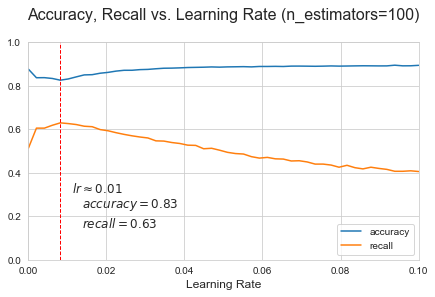

In [289]:
lr_max = np.linspace(0.0001, 0.1, 50)[np.argmax(np.array(recall))]
rcl_max = recall[np.argmax(np.array(recall))]
acc_max = accuracy[np.argmax(np.array(recall))]

fig, ax = plt.subplots(figsize=(7,4))
ax = sns.lineplot(x=np.linspace(0.0001, 0.1, 50), y=accuracy, label='accuracy')
ax = sns.lineplot(x=np.linspace(0.0001, 0.1, 50), y=recall, label='recall')
ax.set_ylim(0,1)
ax.set_xlim(0,0.1)

ax.axvline(lr_max, color='r', ls='--', lw=1)
ax.text(lr_max+0.003, 0.15, r'$lr \approx 0.01$'+'\n   '+r'$accuracy = 0.83$'+'\n   '+r'$recall = 0.63$', size=12)
ax.set_title('Accuracy, Recall vs. Learning Rate (n_estimators=100)\n', size=16)
ax.set_xlabel('Learning Rate', size=12)
fig.savefig('plots/04_acc_rcl_lr.png', bbox_inches='tight')

In [363]:
%%time
t0 = time.time()
recall, accuracy = [], []
for n_est in np.linspace(2, 100, 50):
    tr = time.time()
    gbc_res = GradientBoostingClassifier(n_estimators=int(n_est), learning_rate=0.01)
    gbc_res.fit(X_train_res, y_train_res)
    
    y_hat = gbc_res.predict(X_ho)
    accuracy.append(accuracy_score(y_ho, y_hat))
    recall.append(recall_score(y_ho, y_hat))
    print(f'{int(n_est):>10}  {recall[-1]:.4f}  {accuracy[-1]:.4f} {time.time()-tr:6.0f}" {time.time()-t0:6.0f}"')

         2  0.6053  0.8371      1"      1"
         4  0.6053  0.8371      1"      2"
         6  0.6053  0.8371      1"      3"
         8  0.6053  0.8371      1"      4"
        10  0.6053  0.8371      2"      6"
        12  0.6053  0.8371      2"      8"
        14  0.6053  0.8371      2"     11"
        16  0.6053  0.8371      3"     14"
        18  0.6053  0.8371      3"     17"
        20  0.6053  0.8371      3"     20"
        22  0.6053  0.8371      4"     24"
        24  0.6053  0.8371      4"     28"
        26  0.6053  0.8371      5"     33"
        28  0.6053  0.8371      5"     38"


KeyboardInterrupt: 

In [306]:
acc_max

0.8288419519300801

ValueError: arrays must all be same length

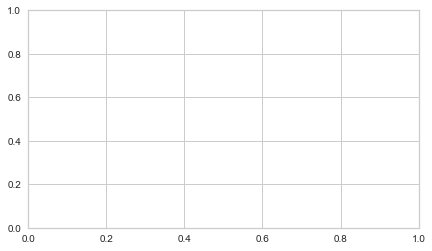

In [364]:
lr_max = np.linspace(2, 100, 50)[np.argmax(np.array(recall))]
rcl_max = recall[np.argmax(np.array(recall))]
acc_max = accuracy[np.argmax(np.array(recall))]

fig, ax = plt.subplots(figsize=(7,4))
ax = sns.lineplot(x=np.linspace(2, 100, 50), y=accuracy, label='accuracy')
ax = sns.lineplot(x=np.linspace(2, 100, 50), y=recall, label='recall')
ax.set_ylim(0,1)
ax.set_xlim(2,100)

ax.axvline(lr_max, color='r', ls='--', lw=1)
ax.text(lr_max+3, 0.15, r'$n_est \approx 10$'+'\n   '+r'$accuracy = 0.83$'+'\n   '+r'$recall = 0.63$', size=12)
ax.set_title('Accuracy, Recall vs. Estimators (learning_rate=0.1)\n', size=16)
ax.set_xlabel('Estimators', size=12)
fig.savefig('plots/04_acc_rcl_nest.png', bbox_inches='tight')

In [380]:
gbc_res = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01)
gbc_res.fit(X_train_res, y_train_res)

y_hat = gbc_res.predict(X_ho)

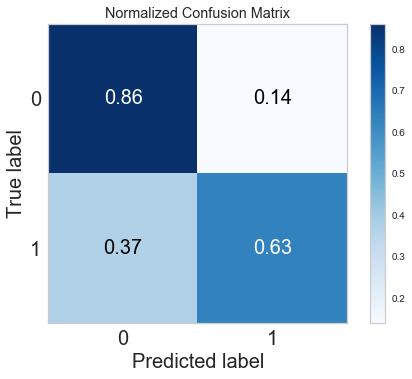

In [381]:
skplt.metrics.plot_confusion_matrix(y_ho, y_hat, text_fontsize=20, normalize=True)

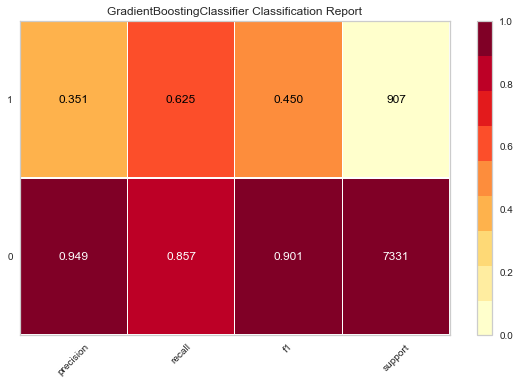

In [375]:
from yellowbrick.classifier import ClassificationReport

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01)
visualizer = ClassificationReport(clf, support=True)

visualizer.fit(X_train_res, y_train_res)  # Fit the visualizer and the model
visualizer.score(X_ho, y_ho)  # Evaluate the model on the test data
g = visualizer.poof()      

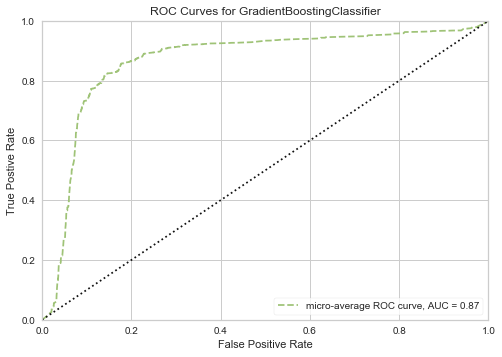

In [385]:
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model and visualizer
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01)
visualizer = ROCAUC(clf, macro=False, per_class=False)

visualizer.fit(X_train_res, y_train_res)  # Fit the training data to the visualizer
visualizer.score(X_ho, y_ho)  # Evaluate the model on the test data
g = visualizer.poof()   

In [308]:
recall

[0.6163175303197354,
 0.6052921719955898,
 0.6052921719955898,
 0.6185226019845645,
 0.6273428886438809,
 0.6218302094818081,
 0.6185226019845645,
 0.6108048511576626,
 0.6030871003307607,
 0.6008820286659317,
 0.5909592061742006,
 0.5832414553472988,
 0.5722160970231532,
 0.5611907386990077,
 0.5644983461962514,
 0.5589856670341786,
 0.5490628445424476,
 0.545755237045204,
 0.535832414553473,
 0.5270121278941565,
 0.5203969128996693,
 0.5115766262403528,
 0.5071664829106945,
 0.4961411245865491,
 0.49173098125689085,
 0.4829106945975744,
 0.4762954796030871,
 0.4663726571113561,
 0.4663726571113561,
 0.46306504961411243,
 0.46085997794928335,
 0.4553472987872106,
 0.44432194046306506,
 0.4432194046306505,
 0.43991179713340683,
 0.43660418963616315,
 0.43329658213891953,
 0.4288864388092613,
 0.42337375964718854,
 0.4211686879823594,
 0.4211686879823594,
 0.422271223814774,
 0.4244762954796031,
 0.42337375964718854,
 0.4189636163175303,
 0.41565600882028664,
 0.412348401323043,
 0.4112

In [188]:
rcl_max

0.6295479603087101

In [179]:
recall

[0.5137816979051819,
 0.6052921719955898,
 0.6052921719955898,
 0.6185226019845645,
 0.6295479603087101,
 0.6262403528114664,
 0.6218302094818081,
 0.6141124586549063,
 0.6119073869900772,
 0.5986769570011026,
 0.5931642778390298,
 0.5843439911797134,
 0.5766262403528115,
 0.5700110253583242,
 0.5644983461962514,
 0.5600882028665931,
 0.5468577728776185,
 0.545755237045204,
 0.5391400220507166,
 0.5347298787210585,
 0.5270121278941565,
 0.525909592061742,
 0.5104740904079382,
 0.5126791620727673,
 0.503858875413451,
 0.49393605292171994,
 0.4884233737596472,
 0.4862183020948181,
 0.474090407938258,
 0.46747519294377066,
 0.47078280044101434,
 0.46416758544652703,
 0.46306504961411243,
 0.45424476295479604,
 0.4553472987872106,
 0.4498346196251378,
 0.43991179713340683,
 0.43991179713340683,
 0.4355016538037486,
 0.4255788313120176,
 0.43439911797133407,
 0.42337375964718854,
 0.4178610804851158,
 0.4255788313120176,
 0.42006615214994486,
 0.41565600882028664,
 0.40683572216097025,
 0.4

In [155]:
np.linspace(0.001, 0.1, 20)

array([0.001     , 0.00621053, 0.01142105, 0.01663158, 0.02184211,
       0.02705263, 0.03226316, 0.03747368, 0.04268421, 0.04789474,
       0.05310526, 0.05831579, 0.06352632, 0.06873684, 0.07394737,
       0.07915789, 0.08436842, 0.08957895, 0.09478947, 0.1       ])

In [285]:
gbc_res = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01)
gbc_res.fit(X_train_res, y_train_res)

y_hat = gbc_res.predict(X_ho)
acc = (accuracy_score(y_ho, y_hat))
rec = (recall_score(y_ho, y_hat))

In [287]:
recall

0.6052921719955898